In [1]:
import numpy as np
import matplotlib.pyplot as plt
import galsim_galaxy

%matplotlib inline

In [2]:
gg = galsim_galaxy.GalsimGalaxyModel()

In [3]:
nx = ny = 64
image = gg.get_image(nx, ny)

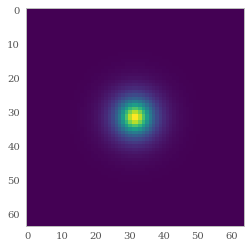

In [4]:
plt.imshow(image.array, interpolation='none')

In [5]:
gg.psf.flux

1.0

In [6]:
image.array.max()

0.0094704079

## Shear bias

In [12]:
import roaster

rstr = roaster.Roaster()
rstr.make_data()

In [14]:
print rstr.data.array.var()

8.02857e-07


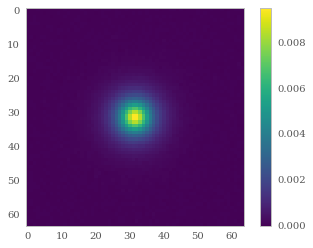

In [22]:
plt.imshow(rstr.data.array, interpolation='none')
plt.colorbar()

In [11]:
def ln_gaus(x, a, x0, sigma):
    return a - 0.5 * (x - x0)**2 / sigma**2
    
def fit_gaussian(dat_x, dat_y):
    from scipy.optimize import curve_fit

    p0 = [-2000, 0., 0.001]

    popt, pcov = curve_fit(ln_gaus, dat_x, dat_y, p0=p0)
    return popt, pcov

[ 0.05103837  0.00079796]
shear bias: 1.038e-03 +/- 7.980e-04


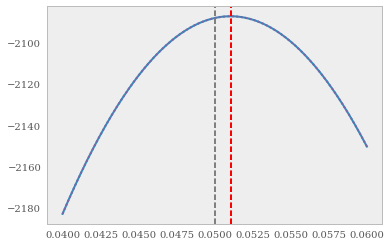

In [24]:
g2 = 0.05
rstr.src_models[0].set_params([0.0, g2])
rstr.make_data()

g = np.linspace(g2 - 0.01, g2 + 0.01, 200)
lnp = np.array([rstr([0.0, g_val]) for g_val in g])

popt, pcov = fit_gaussian(g, lnp)
print popt[1:3]

print "shear bias: {:4.3e} +/- {:4.3e}".format(popt[1] - g2, popt[2])

plt.plot(g, lnp)
plt.plot(g, ln_gaus(g, popt[0], popt[1], popt[2]), linestyle='dotted')
plt.axvline(g2, color='grey', linestyle='dashed')
plt.axvline(g[np.argmax(lnp)], color='red', linestyle='dashed')

In [25]:
g_true = np.linspace(-0.2, 0.2, 50)

bias = np.zeros((len(g_true), 2), dtype=np.float64)
for i, gt in enumerate(g_true):
    if np.mod(i, 5) == 0:
        print "--- {:d} / {:d} ---".format(i, len(g_true))
    rstr.src_models[0].set_params([0.0, gt])    
    rstr.make_data()
    g = np.linspace(gt - 0.01, gt + 0.01, 100)
    lnp = np.array([rstr([0.0, g_val]) for g_val in g])
    try:
        popt, pcov = fit_gaussian(g, lnp)
        bias[i, 0] = popt[1] - gt
        bias[i, 1] = popt[2]
    except RuntimeError:
        plt.plot(g, lnp)

--- 0 / 50 ---
--- 5 / 50 ---
--- 10 / 50 ---
--- 15 / 50 ---
--- 20 / 50 ---
--- 25 / 50 ---
--- 30 / 50 ---
--- 35 / 50 ---
--- 40 / 50 ---
--- 45 / 50 ---


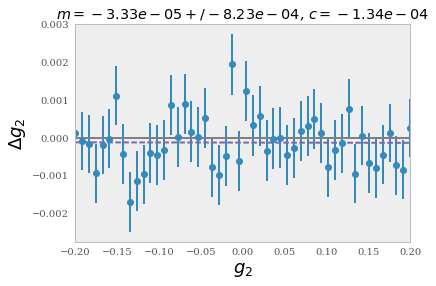

In [26]:
from scipy.stats import linregress
slope, intercept, r_value, p_value, std_err = linregress(g_true, bias[:,0])
xl = np.linspace(np.min(g_true), np.max(g_true), 50)

plt.errorbar(g_true, bias[:,0], yerr=bias[:,1], fmt='o')
plt.axhline(0., color='grey')
plt.plot(xl, slope*xl + intercept, '--')
plt.xlabel(r"$g_2$", fontsize=18)
plt.ylabel(r"$\Delta g_{:d}$".format(2), fontsize=18)
plt.xlim(-0.2, 0.2)
plt.title(r"$m = {:3.2e} +/- {:3.2e}$, $c = {:3.2e}$".format(slope, std_err, intercept))

In [15]:
import unittest

In [ ]:
unittest.TestCase.